In [31]:
!jt -t oceans16
#jt -r para volver al tema original

# EDA

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd
#import plotly.express as px
#import calendar
#import descartes
import os, sys

from matplotlib.ticker import FuncFormatter
#from shapely.geometry import Point, Polygon

In [36]:
os.chdir("../..")
os.chdir("src/utils")

In [37]:
import eda

In [38]:
data = pd.read_csv('../../data/Rodent_Inspection.csv')

In [39]:
data.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,13252142,PC7732347,1,2024090050,2,2409,50,0000,MELROSE AVENUE,NaN,NaN,NaN,0.0,0.0,Bronx,07/07/2021 10:05:45 AM,Failed for Other R,07/09/2021 11:33:07 AM,"(0.0, 0.0)"
1,Compliance,12802045,PC7500960,2,5011840160,5,1184,160,000,WENLOCK STREET,NaN,NaN,NaN,0.0,0.0,Staten Island,11/10/2011 02:50:52 PM,Failed for Other R,11/14/2011 03:28:40 PM,"(0.0, 0.0)"
2,Compliance,12990129,PC7054124,2,3089140016,3,8914,16,000,Abbey Court,NaN,0.0,0.0,0.0,0.0,Brooklyn,09/26/2017 02:00:25 PM,Passed,09/27/2017 12:58:55 PM,NaN
3,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
4,Initial,11362643,PC7466087,1,5002210035,5,221,35,000,Roe Street,NaN,950510.0,169320.0,0.0,0.0,Staten Island,06/02/2016 03:08:18 PM,Passed,06/07/2016 02:35:38 PM,"(0.0, 0.0)"


In [40]:
len(data)

2007833

**Al día 16 de noviembre de 2021 contamos con 2,007,833 datos**

In [41]:
data.columns

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

Los tipos de dato que tiene cada variable inicialmente son:

In [42]:
data.dtypes

INSPECTION_TYPE                 object
JOB_TICKET_OR_WORK_ORDER_ID      int64
JOB_ID                          object
JOB_PROGRESS                     int64
BBL                              int64
BORO_CODE                        int64
BLOCK                            int64
LOT                              int64
HOUSE_NUMBER                    object
STREET_NAME                     object
ZIP_CODE                       float64
X_COORD                        float64
Y_COORD                        float64
LATITUDE                       float64
LONGITUDE                      float64
BOROUGH                         object
INSPECTION_DATE                 object
RESULT                          object
APPROVED_DATE                   object
LOCATION                        object
dtype: object

Cambiamos el formato de las columnas

In [43]:
def clean_column(col):
    """ Replace column's spaces and slash with underscore"""
    return col.lower()\
              .replace('/','_')\
              .replace(' ','_')

In [44]:
data.rename(columns={col: clean_column(col) for col in data.columns.values}, inplace=True)

## Perfilamiento general con los datos en crudo

In [45]:
eda.genera_profiling_general(data)

El dataframe tiene 20 columnas.
Hay 12 columnas que tienen NA's.


,Estadísticas,Resultado
0,Total de variables,20
1,Conteo de observaciones,2007833
2,Total de celdas,40156660
3,Cantidad de variables numéricas,11
4,Cantidad de variables de fecha,0
5,Cantidad de variables categóricas,0
6,Cantidad de variables de texto,9
7,Valores faltantes,334484
8,Porcentaje de valores faltantes,0.8%
9,Renglones duplicados,0


**Basado en el bajo porcentaje de datos faltantes (0.8%), podríamos eliminar directo todas las filas con datos faltantes.**

En la base de datos tenemos 334,484 elementos faltantes, distribuidos de la siguiente forma:

In [46]:
eda.cuenta_nulos_por_columnas(data)

El dataframe tiene 20 columnas.
Hay 12 columnas que tienen NA's.


,Missing Values,% del Total
x_coord,123209,6.1
y_coord,123209,6.1
house_number,48758,2.4
zip_code,11154,0.6
location,7397,0.4
latitude,6754,0.3
longitude,6754,0.3
street_name,5483,0.3
approved_date,1633,0.1
borough,103,0.0


- Podríamos eliminar **`x_coord`** y **`y_coord`**, que tienen un gran porcentaje de datos faltantes y son coordenadas en un mapa específico de NY, y quedarnos solo con **`latitude`** y **`longitude`**.

Cambiamos tipos de datos

In [47]:
data = data.astype({"boro_code":'category',
                    "bbl":'category',
                    "block":'category',
                    "lot":'category',
                    "job_ticket_or_work_order_id":'category',"inspection_type":'category',
                    "zip_code":'category', 
                    "borough":'category', 
                    "result":'category'})
data['inspection_date'] = pd.to_datetime(data['inspection_date'], dayfirst=True)
data['approved_date'] = pd.to_datetime(data['approved_date'], dayfirst=True)

data.dtypes

inspection_type                      category
job_ticket_or_work_order_id          category
job_id                                 object
job_progress                            int64
bbl                                  category
boro_code                            category
block                                category
lot                                  category
house_number                           object
street_name                            object
zip_code                             category
x_coord                               float64
y_coord                               float64
latitude                              float64
longitude                             float64
borough                              category
inspection_date                datetime64[ns]
result                               category
approved_date                  datetime64[ns]
location                               object
dtype: object

Generamos perfilamiento por tipo de variable

In [48]:
profiling_numericas, profiling_categoricas, profiling_texto, profiling_fechas = \
eda.genera_profiling_por_variable(data)

In [49]:
profiling_numericas

,Métrica,job_progress,x_coord,y_coord,latitude,longitude
0,Tipo,int64,float64,float64,float64,float64
1,Número de observaciones,2.00783e+06,1.88462e+06,1.88462e+06,2.00108e+06,2.00108e+06
2,Media,1.92,1.01993e+06,233848,40.54,-73.54
3,Desviación estándar,3.71,1.93368e+06,1.89098e+06,2.98,5.4
4,Cuartil 25%,1,995025,193617,40.7,-73.96
5,Cuartil 50%,1,1.00301e+06,217984,40.76,-73.93
6,Cuartil 75%,2,1.01229e+06,242724,40.83,-73.9
7,Mínimo,1,0,0,-18.91,-79.47
8,Máximo,175,3.19139e+08,3.74392e+08,40.91,0
9,Número de observaciones únicas,175,83782,111316,311211,311691


**Observaciones**: 

`job_progress`:

- La gran mayoría de valores de `job_progress` son 1 o 2, aunque es un número consecutivo hasta 175.
- **SÍ** parece relevante para el modelo??

`x/y_coord` y `latitude/longitude`:

- Podríamos trabajar únicamente con latitud y longitud, que tienen menos datos faltantes.  `x/y_coord` son las coordenadas en un mapa específico de NY.
- `latitude/longitude` **SÍ** parecen relevantes para el modelo.

**¿DEBERÍAMOS COMBINAR MANUALMENTE `latitude/longitude`?**

In [50]:
data.loc[data.job_progress == 1, 'inspection_type'].unique()

['Initial', 'BAIT', 'STOPPAGE', 'Compliance']
Categories (4, object): ['Initial', 'BAIT', 'STOPPAGE', 'Compliance']

array([[<AxesSubplot:title={'center':'job_progress'}>]], dtype=object)

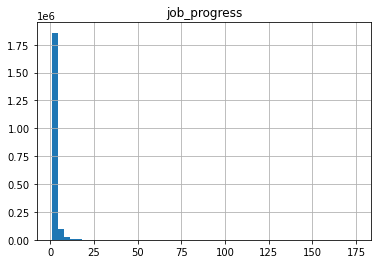

In [51]:
data.hist('job_progress', bins=50, )

In [52]:
profiling_categoricas

,Métrica,inspection_type,job_ticket_or_work_order_id,bbl,boro_code,block,lot,zip_code,borough,result
0,Tipo,category,category,category,category,category,category,category,category,category
1,Número de categorías,5,2007833,296006,6,12368,1253,229,5,7
2,Número de observaciones,2007833,2007833,2007833,2007833,2007833,2007833,2007833,2007833,2007833
3,Observaciones nulas,0,0,0,0,0,0,11154,103,13
4,% Observaciones nulas,0,0,0,0,0,0,0.00555524,5.12991e-05,6.47464e-06
5,Valores únicos,"[Initial, Compliance, BAIT, STOPPAGE, CLEAN_UPS]","[13252142, 12802045, 12990129, 12328443, 11362...","[2024090050, 5011840160, 3089140016, 202539013...","[2, 5, 3, 1, 4, 9]","[2409, 1184, 8914, 2539, 221, 638, 1879, 2076,...","[50, 160, 16, 132, 35, 19, 41, 63, 54, 53, 15,...","[nan, 10025.0, 11215.0, 10009.0, 10301.0, 1030...","[Bronx, Staten Island, Brooklyn, Manhattan, Qu...","[Failed for Other R, Passed, Rat Activity, Bai..."
6,Moda1/veces/%,"[Initial, 1,416,858, 70.57%]","[13294388, 1, 0.0%]","[1003020001, 438, 0.02%]","[1, 641,019, 31.93%]","[2877, 3,388, 0.17%]","[1, 97,715, 4.87%]","[10457.0, 81,408, 4.08%]","[Manhattan, 641,019, 31.93%]","[Passed, 1,233,859, 61.45%]"
7,Moda2/veces/%,"[BAIT, 307,794, 15.33%]","[11694347, 1, 0.0%]","[1001650001, 421, 0.02%]","[2, 596,696, 29.72%]","[2879, 3,293, 0.16%]","[29, 29,974, 1.49%]","[11221.0, 76,437, 3.83%]","[Bronx, 596,696, 29.72%]","[Bait applied, 271,199, 13.51%]"
8,Moda3/veces/%,"[Compliance, 280,931, 13.99%]","[11694349, 1, 0.0%]","[3001390001, 415, 0.02%]","[3, 531,773, 26.48%]","[2782, 3,241, 0.16%]","[10, 29,137, 1.45%]","[10458.0, 73,200, 3.67%]","[Brooklyn, 531,773, 26.49%]","[Rat Activity, 266,881, 13.29%]"


**Observaciones:**

`inspection_type`:
- Sin observaciones.  
- **SÍ** parece relevante para el modelo.

`job_ticket_or_work_order_d`:
- Identificador del trabajo.
- No parece relevante para el modelo.

`bbl`:
- Combinación de lote/distrito/manzana.
- **SÍ** parece relevante para el modelo??

`boro_code`:
- Hay 103 observaciones con `boro_code` = 9, cuando deberìa haber solo valores 1-5 (los 5 distritos de NY).  Parecen ser errores de captura y todos tienen coordenadas NaN.
- No tiene valores nulos.
- 1:  Manhattan, 2:  Bronx, 3:  Brooklyn, 4:  Queens, 5:  Staten Island, 9:  NaN
- **SÍ** parece relevante para el modelo.

`block`:
- Número de manzana en el taxlot, se repite en los distritos (`borough_code`).
- No parece relevante para el modelo.

`lot`:
- Se repite en distintos `block`.
- No parece relevante para el modelo.

`zip_code`:
- Pocos valores nulos (11,154).
- **SÍ** parece relevante para el modelo.

`borough`:
- Muy pocos valores nulos (103).
- Distrito de NY, y está en valor numérico en `boro_code`.
- No parece relevante para el modelo.

**`result`:**
- Tenemos 7 categorías originales.
- Muy pocos valores nulos (7).
- Podemos dejar solo 2 categorías:  `0-Pass` y `1-Fail`.
- `0-Pass` englobaría 2 categorías:  (Passed, monitoring visit)
- `1-Fail` englobaría 4 categorías (Failed for other R, Rat Activity, stoppage done, cleanup done).
- Eliminaríamos todos los registros con `result = Bait applied`, que no representan el hallazgo o no de roedores.
- **`TARGET`**

In [53]:
data.loc[data.boro_code == 1, 'borough'].unique()

['Manhattan']
Categories (1, object): ['Manhattan']

In [54]:
len(data.loc[data.boro_code == 9])

103

In [55]:
data.loc[data.boro_code == 9]

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,zip_code,x_coord,y_coord,latitude,longitude,borough,inspection_date,result,approved_date,location
124,BAIT,2803782,PC7665827,7,9032790043,9,3279,43,311,HARMAN STREET,11237.0,NaN,NaN,NaN,NaN,NaN,2021-05-05 09:17:00,Bait applied,2021-05-05 15:50:31,NaN
237,BAIT,2805341,PC7680746,1,9017170045,9,1717,45,16,W 119 street,10026.0,NaN,NaN,NaN,NaN,NaN,2021-07-06 12:12:00,Monitoring visit,2021-08-06 09:25:31,NaN
356,BAIT,2813489,PC7668165,3,9046720001,9,4672,1,1144,Lenox Road,11212.0,NaN,NaN,NaN,NaN,NaN,2021-08-17 12:16:49,Bait applied,2021-08-23 11:21:12,NaN
366,BAIT,2793291,PC7649208,1,9015620017,9,1562,17,429,EAST 82 STREET,10028.0,NaN,NaN,NaN,NaN,NaN,2020-10-23 10:01:00,Bait applied,2020-10-26 11:07:33,NaN
565,BAIT,2811855,PC7661084,2,9032520015,9,3252,15,638,KOSCIUSZKO STREET,11221.0,NaN,NaN,NaN,NaN,NaN,2021-01-08 13:45:47,Bait applied,2021-09-08 11:53:42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856384,BAIT,2791751,PC7634573,2,9013510013,9,1351,13,329,East 58 Street,10022.0,NaN,NaN,NaN,NaN,NaN,2020-08-09 09:19:20,Bait applied,2020-08-09 10:10:23,NaN
1880282,BAIT,2801483,PC7665827,5,9032790043,9,3279,43,311,HARMAN STREET,11237.0,NaN,NaN,NaN,NaN,NaN,2021-07-04 09:25:00,Bait applied,2021-07-04 20:22:15,NaN
1882026,BAIT,2802021,PC7679232,2,9053610078,9,5361,78,211,East 9 Street,11218.0,NaN,NaN,NaN,NaN,NaN,2021-04-16 10:00:57,Bait applied,2021-04-22 09:44:12,NaN
1884646,BAIT,2792734,PC7634581,4,9013510017,9,1351,17,339,East 58 Street,10022.0,NaN,NaN,NaN,NaN,NaN,2020-06-10 10:47:28,Bait applied,2020-08-10 13:27:31,NaN


In [56]:
data['result'].unique()

['Failed for Other R', 'Passed', 'Rat Activity', 'Bait applied', 'Stoppage done', 'Monitoring visit', 'Cleanup done', NaN]
Categories (7, object): ['Failed for Other R', 'Passed', 'Rat Activity', 'Bait applied', 'Stoppage done', 'Monitoring visit', 'Cleanup done']

In [57]:
profiling_texto

,Métrica,job_id,house_number,street_name,location
0,Tipo,object,object,object,object
1,Número de observaciones,2007833,2007833,2007833,2007833
2,Observaciones únicas,1445313,21308,12082,311840
3,% Observaciones únicas,0.719837,0.0106124,0.00601743,0.155312
4,Observaciones nulas,0,48758,5483,7397
5,% Observaciones nulas,0,0.0242839,0.0027308,0.00368407
6,Tamaño promedio,9,3.35165,13.7171,34.6904
7,Tamaño mínimo,9,1,1,10
8,Tamaño máximo,9,47,43,38


**Observaciones:**

`job_id`:
- Es un identificador interno.  
- Hay menos observaciones únicas, que observaciones totales.
- No parece relevante para el modelo.

`house_number`:
- Es la tercera columna con más datos faltantes (después de `x/y_coord`), aunque el porcentaje total de valores faltantes no es tan alto.  
- No parece relevante para el modelo.

`street_name`:
- A veces trae toda la dirección y a veces solo el nombre de la calle.
- No parece relevante para el modelo.

`location`:
- Es la combinación de `latitude` y `longitude` con varios errores, parece mejor trabajar con las coordenadas por separado.  
- No parece relevante para el modelo.

In [58]:
profiling_fechas

,Métrica,inspection_date,approved_date
0,Tipo,datetime64[ns],datetime64[ns]
1,Número de observaciones,2007816,2006200
2,Mínimo,1918-10-19 14:34:44,2009-01-10 08:06:55
3,Máximo,2029-01-01 09:35:51,2021-12-11 17:14:04
4,Número de observaciones únicas,1951381,1077711
5,Número de faltantes,17,1633
6,Top1/veces/%,"[2011-01-10 12:00:00, 30, 0.0%]","[2010-08-13 16:09:45, 61, 0.0%]"
7,Top2/veces/%,"[2011-11-19 12:00:00, 28, 0.0%]","[2010-08-17 14:31:44, 52, 0.0%]"
8,Top3/veces/%,"[2011-12-11 12:00:00, 28, 0.0%]","[2010-08-27 15:08:45, 50, 0.0%]"


**Observaciones:**

`inspection_date`:
- Se observan errores en la captura, con un mínimo del año 1918 y un máximo de 2029.
- Muy pocos datos faltantes.
- **SÍ** parece relevante para el modelo.

**HAY QUE LIMPIAR `INSPECTION_DATE`.**

`approved_date`:  
- De manera general esta fecha sucede después de `inspection_date`, aunque hay 379,646 registros en los que está registrada antes, quizás por error?  
- Pocos datos faltantes.
- Parecería haber errores de captura.
- No parece relevante para el modelo.

In [60]:
len(data.loc[data.inspection_date > data.approved_date])

379646

## Perfilamiento general haciendo limpieza de datos

Cambiamos tipos de variable para poder estandarizar el formato

In [66]:
data = data.astype({"inspection_type":'str',
                    "job_ticket_or_work_order_id":'str', 
                    "borough":'str', 
                    "job_id":'str', 
                    "house_number":'str',
                    "street_name":'str',
                    "result":'str'})

In [67]:
eda.EstandarizaFormato(data)

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,zip_code,x_coord,y_coord,latitude,longitude,borough,inspection_date,result,approved_date,location
0,initial,13252142,pc7732347,1,2024090050,2,2409,50,0000,melrose avenue,NaN,NaN,NaN,0.000000,0.000000,bronx,2021-07-07 10:05:45,failed for other r,2021-09-07 11:33:07,"(0.0, 0.0)"
1,compliance,12802045,pc7500960,2,5011840160,5,1184,160,000,wenlock street,NaN,NaN,NaN,0.000000,0.000000,staten island,2011-10-11 14:50:52,failed for other r,2011-11-14 15:28:40,"(0.0, 0.0)"
2,compliance,12990129,pc7054124,2,3089140016,3,8914,16,000,abbey court,NaN,0.0,0.0,0.000000,0.000000,brooklyn,2017-09-26 14:00:25,passed,2017-09-27 12:58:55,NaN
3,initial,12328443,pc6737067,1,2025390132,2,2539,132,10,maj wm deegan blvd,NaN,1003704.0,240136.0,0.000000,0.000000,bronx,2017-12-09 14:45:42,passed,2017-09-14 14:41:03,"(0.0, 0.0)"
4,initial,11362643,pc7466087,1,5002210035,5,221,35,000,roe street,NaN,950510.0,169320.0,0.000000,0.000000,staten island,2016-02-06 15:08:18,passed,2016-07-06 14:35:38,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007828,bait,2794092,pc7631543,3,3070090093,3,7009,93,2817,west 31st street,11224.0,NaN,NaN,40.576870,-73.997790,brooklyn,2020-11-13 10:40:17,bait applied,2020-11-19 09:57:23,"(40.576869541636, -73.997789732118)"
2007829,initial,11766472,pc6134985,1,1012137503,1,1213,7503,125,west 82 street,10024.0,991100.0,225147.0,40.784287,-73.974968,manhattan,2011-09-27 13:11:05,passed,2011-04-10 15:28:01,"(40.784286637984, -73.974968256738)"
2007830,initial,13200009,pc7666948,1,3032040049,3,3204,49,11a,suydam street,11221.0,NaN,NaN,40.695740,-73.931994,brooklyn,2021-08-01 09:56:08,rat activity,2021-01-13 08:45:45,"(40.695739614028, -73.931993752337)"
2007831,compliance,12836869,pc7476745,2,4018780026,4,1878,26,96-05,50 avenue,11368.0,1021168.0,209589.0,40.741866,-73.866773,queens,2012-12-19 14:55:45,passed,2012-12-27 11:17:13,"(40.741865890811, -73.866772709)"


Y volvemos a crear el profiling general

In [69]:
data = data.astype({"inspection_type":'category',
                    "job_ticket_or_work_order_id":'category', 
                    "borough":'category', 
                    "result":'category'})

In [70]:
profiling_numericas, profiling_categoricas, profiling_texto,profiling_fechas = \
eda.genera_profiling_por_variable(data)

Sólo nos interesa revisar el perfilamiento de variables categóricas y de texto, pues son las que se vieron afectadas con la estandarización de formato

In [71]:
profiling_categoricas

,Métrica,inspection_type,job_ticket_or_work_order_id,bbl,boro_code,block,lot,zip_code,borough,result
0,Tipo,category,category,category,category,category,category,category,category,category
1,Número de categorías,5,2007833,296006,6,12368,1253,229,6,8
2,Número de observaciones,2007833,2007833,2007833,2007833,2007833,2007833,2007833,2007833,2007833
3,Observaciones nulas,0,0,0,0,0,0,11154,0,0
4,% Observaciones nulas,0,0,0,0,0,0,0.00555524,0,0
5,Valores únicos,"[initial, compliance, bait, stoppage, clean_ups]","[13252142, 12802045, 12990129, 12328443, 11362...","[2024090050, 5011840160, 3089140016, 202539013...","[2, 5, 3, 1, 4, 9]","[2409, 1184, 8914, 2539, 221, 638, 1879, 2076,...","[50, 160, 16, 132, 35, 19, 41, 63, 54, 53, 15,...","[nan, 10025.0, 11215.0, 10009.0, 10301.0, 1030...","[bronx, staten island, brooklyn, manhattan, qu...","[failed for other r, passed, rat activity, bai..."
6,Moda1/veces/%,"[initial, 1,416,858, 70.57%]","[2822528, 1, 0.0%]","[1003020001, 438, 0.02%]","[1, 641,019, 31.93%]","[2877, 3,388, 0.17%]","[1, 97,715, 4.87%]","[10457.0, 81,408, 4.08%]","[manhattan, 641,019, 31.93%]","[passed, 1,233,859, 61.45%]"
7,Moda2/veces/%,"[bait, 307,794, 15.33%]","[12017100, 1, 0.0%]","[1001650001, 421, 0.02%]","[2, 596,696, 29.72%]","[2879, 3,293, 0.16%]","[29, 29,974, 1.49%]","[11221.0, 76,437, 3.83%]","[bronx, 596,696, 29.72%]","[bait applied, 271,199, 13.51%]"
8,Moda3/veces/%,"[compliance, 280,931, 13.99%]","[12017102, 1, 0.0%]","[3001390001, 415, 0.02%]","[3, 531,773, 26.48%]","[2782, 3,241, 0.16%]","[10, 29,137, 1.45%]","[10458.0, 73,200, 3.67%]","[brooklyn, 531,773, 26.48%]","[rat activity, 266,881, 13.29%]"


No se aprecian cambios en el profiling de variables categóricas.

In [72]:
profiling_texto

,Métrica,job_id,house_number,street_name,location
0,Tipo,object,object,object,object
1,Número de observaciones,2007833,2007833,2007833,2007833
2,Observaciones únicas,1445313,21299,9896,311840
3,% Observaciones únicas,0.719837,0.010608,0.0049287,0.155312
4,Observaciones nulas,0,0,0,7397
5,% Observaciones nulas,0,0,0,0.00368407
6,Tamaño promedio,9,3.34311,13.6702,34.6904
7,Tamaño mínimo,9,1,1,10
8,Tamaño máximo,9,47,43,38


- Se redujo el número de observaciones únicas en `house_number` y en `street_name`.

Tablas de `inspection_type` y `result``:

In [74]:
eda.CreaTablaConteoPorcentaje(data, "inspection_type", False)

,inspection_type,porcentaje
initial,"1,416,858",70.57%
bait,"307,794",15.33%
compliance,"280,931",13.99%
clean_ups,"1,585",0.08%
stoppage,665,0.03%


In [75]:
eda.CreaTablaConteoPorcentaje(data, "result", False)

,result,porcentaje
passed,"1,233,859",61.45%
bait applied,"271,199",13.51%
rat activity,"266,881",13.29%
failed for other r,"197,036",9.81%
monitoring visit,"36,595",1.82%
cleanup done,"1,585",0.08%
stoppage done,665,0.03%
nan,13,0.0%


Observamos que la mayoría de las inspecciones son iniciales, y que más de la más de la mitad pasan la inspeccion.

# GEDA:

In [77]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%d%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

In [79]:
result = pd.DataFrame(data['result'].value_counts())
result = result.rename(columns = {'result':'counts'})
result

,counts
passed,1233859
bait applied,271199
rat activity,266881
failed for other r,197036
monitoring visit,36595
cleanup done,1585
stoppage done,665
nan,13


In [84]:
result

,counts
passed,1233859
bait applied,271199
rat activity,266881
failed for other r,197036
monitoring visit,36595
cleanup done,1585
stoppage done,665
nan,13


In [88]:
result['counts']

passed                1233859
bait applied           271199
rat activity           266881
failed for other r     197036
monitoring visit        36595
cleanup done             1585
stoppage done             665
nan                        13
Name: counts, dtype: int64

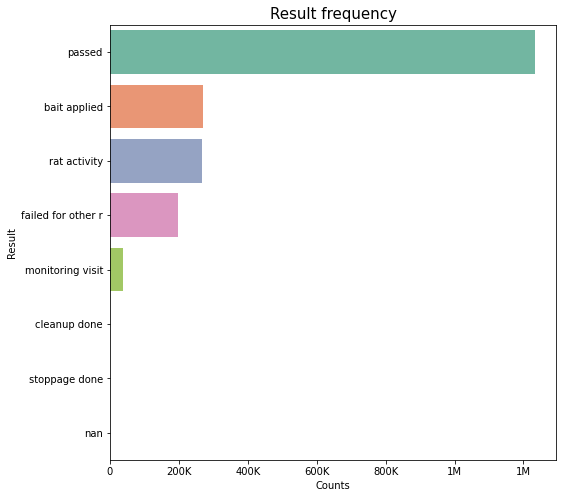

In [91]:
plt.figure(figsize=(8,8)) 
ax = sns.barplot(x="counts", 
                 y=result.index, 
                 data=result,
                 order=result.index,
                 palette="Set2") 
ax.set(xlabel='Counts',
       ylabel='Result')
plt.title('Result frequency', size = 15)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.show()

In [92]:
data.head()

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,zip_code,x_coord,y_coord,latitude,longitude,borough,inspection_date,result,approved_date,location
0,initial,13252142,pc7732347,1,2024090050,2,2409,50,0000,melrose avenue,NaN,NaN,NaN,0.0,0.0,bronx,2021-07-07 10:05:45,failed for other r,2021-09-07 11:33:07,"(0.0, 0.0)"
1,compliance,12802045,pc7500960,2,5011840160,5,1184,160,000,wenlock street,NaN,NaN,NaN,0.0,0.0,staten island,2011-10-11 14:50:52,failed for other r,2011-11-14 15:28:40,"(0.0, 0.0)"
2,compliance,12990129,pc7054124,2,3089140016,3,8914,16,000,abbey court,NaN,0.0,0.0,0.0,0.0,brooklyn,2017-09-26 14:00:25,passed,2017-09-27 12:58:55,NaN
3,initial,12328443,pc6737067,1,2025390132,2,2539,132,10,maj wm deegan blvd,NaN,1003704.0,240136.0,0.0,0.0,bronx,2017-12-09 14:45:42,passed,2017-09-14 14:41:03,"(0.0, 0.0)"
4,initial,11362643,pc7466087,1,5002210035,5,221,35,000,roe street,NaN,950510.0,169320.0,0.0,0.0,staten island,2016-02-06 15:08:18,passed,2016-07-06 14:35:38,"(0.0, 0.0)"


In [93]:
result_inspection = data.groupby(['result', 'inspection_type'], as_index=False).size()

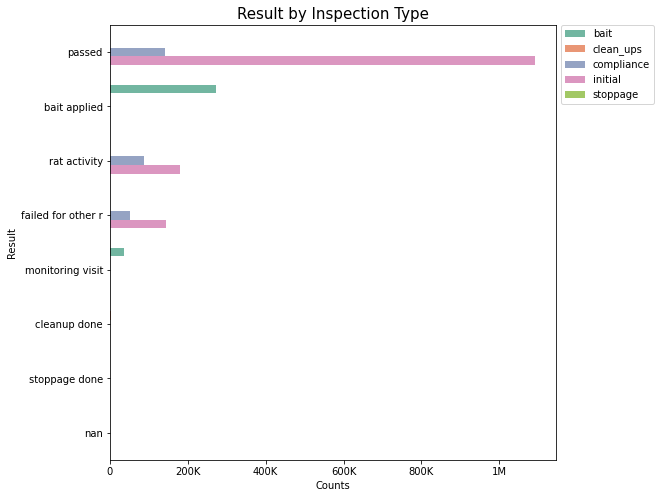

In [101]:
plt.figure(figsize=(8, 8)) 
ax = sns.barplot(y="result", 
                 x="size", 
                 data=result_inspection, 
                 hue="inspection_type",
                 order=result.index,
                 palette="Set2")
ax.set(xlabel='Counts',
       ylabel='Result')
plt.title('Result by Inspection Type', size = 15)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.legend(bbox_to_anchor=(1.01, 1),
          loc = 'upper left',
          borderaxespad = 0)
plt.show()

In [96]:
data.loc[data.result == 'bait applied', 'inspection_type'].unique()

['bait']
Categories (1, object): ['bait']

Parece que para `result = bait applied`, siempre es el `inspection_type = bait`.

**¿Podríamos eliminar estas observaciones para el modelo?**

**¿El `result = monitoring visit` significa que fue una visita de monitoreo exitosa?**

In [97]:
result_borough = data.groupby(['result', 'borough'], as_index=False).size()

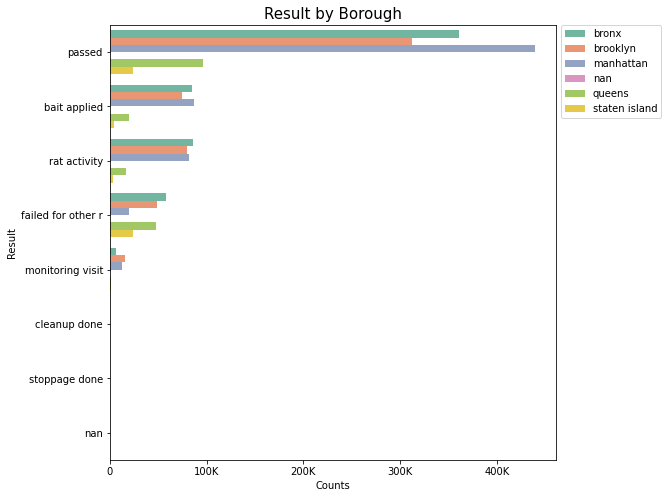

In [155]:
plt.figure(figsize=(8, 8)) 
ax = sns.barplot(y="result", 
                 x="size", 
                 data=result_borough, 
                 hue="borough",
                 order=result.index,
                 palette="Set2")
ax.set(xlabel='Counts',
       ylabel='Result')
plt.title('Result by Borough', size = 15)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.legend(bbox_to_anchor=(1.01, 1),
          loc = 'upper left',
          borderaxespad = 0)
plt.show()

# Gráficas temporales:

<AxesSubplot:xlabel='inspection_date'>

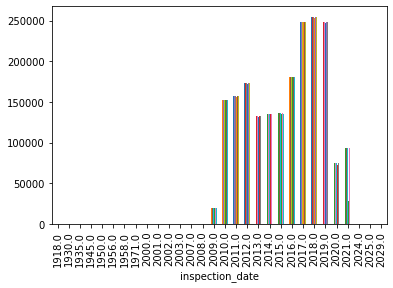

In [113]:
data.groupby(data["inspection_date"].dt.year).count().plot(kind="bar", legend=None)

<AxesSubplot:xlabel='inspection_date'>

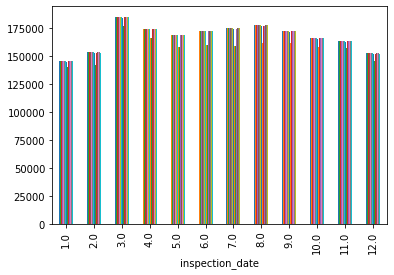

In [114]:
data.groupby(data["inspection_date"].dt.month).count().plot(kind="bar", legend=None)

- Se ve una distribución de inspecciones relativamente uniforme a lo largo de los 12 meses del año.
- Parece que en realidad los datos contenidos empiezan a partir del 2009.

In [115]:
data['date'] = pd.to_datetime(data['inspection_date'], format='%m/%d/%Y')
data['ones'] = 1
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year

In [116]:
data.head()

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,...,longitude,borough,inspection_date,result,approved_date,location,date,ones,month,year
0,initial,13252142,pc7732347,1,2024090050,2,2409,50,0000,melrose avenue,...,0.0,bronx,2021-07-07 10:05:45,failed for other r,2021-09-07 11:33:07,"(0.0, 0.0)",2021-07-07 10:05:45,1,7.0,2021.0
1,compliance,12802045,pc7500960,2,5011840160,5,1184,160,000,wenlock street,...,0.0,staten island,2011-10-11 14:50:52,failed for other r,2011-11-14 15:28:40,"(0.0, 0.0)",2011-10-11 14:50:52,1,10.0,2011.0
2,compliance,12990129,pc7054124,2,3089140016,3,8914,16,000,abbey court,...,0.0,brooklyn,2017-09-26 14:00:25,passed,2017-09-27 12:58:55,NaN,2017-09-26 14:00:25,1,9.0,2017.0
3,initial,12328443,pc6737067,1,2025390132,2,2539,132,10,maj wm deegan blvd,...,0.0,bronx,2017-12-09 14:45:42,passed,2017-09-14 14:41:03,"(0.0, 0.0)",2017-12-09 14:45:42,1,12.0,2017.0
4,initial,11362643,pc7466087,1,5002210035,5,221,35,000,roe street,...,0.0,staten island,2016-02-06 15:08:18,passed,2016-07-06 14:35:38,"(0.0, 0.0)",2016-02-06 15:08:18,1,2.0,2016.0


In [117]:
data['year'].unique()

array([2021., 2011., 2017., 2016., 2012., 2020., 2019., 2010., 2013.,
       2009., 2018., 2015., 2014.,   nan, 1935., 2001., 2003., 2025.,
       2002., 2008., 2024., 1956., 2000., 1950., 1918., 2007., 1958.,
       1930., 1971., 1945., 2029.])

In [136]:
data.loc[data.year == 2009, 'year'].count()

19771

In [137]:
data.loc[data.year == 2008, 'year'].count()

5

- Comprobamos que los datos correctos empiezan a partir del año 2009.